In [1]:
from Base import *
import numpy as np
import pandas as pd

nifty = pd.read_csv('Data/nifty750_price.csv', index_col=0)
nifty.index = pd.to_datetime(nifty.index)
nifty.columns = [col.replace('.NS', '') for col in nifty.columns]

nifty_high = pd.read_csv('Data/nifty750_high.csv', index_col=0)
nifty_high.index = pd.to_datetime(nifty_high.index)
nifty_high.columns = [col.replace('.NS', '') for col in nifty_high.columns]

nifty_low = pd.read_csv('Data/nifty750_low.csv', index_col=0)
nifty_low.index = pd.to_datetime(nifty_low.index)
nifty_low.columns = [col.replace('.NS', '') for col in nifty_low.columns]


nifty_volume = pd.read_csv('Data/nifty750_volume.csv', index_col=0, parse_dates=['Date'])
nifty_volume.index = pd.to_datetime(nifty_volume.index)
nifty_volume.columns = [col.replace('.NS', '') for col in nifty_volume.columns]

# Step 1(b): Compute Industry Returns
industry = pd.read_csv('Data/industry_tickers.csv', index_col=0)
# Ensure the tickers in df.columns are in industry.index

industry_map = {}

for _, row in industry.iterrows():
    industry_name = row['Industry']
    symbol = row['Symbol']
    
    if industry_name not in industry_map:
        industry_map[industry_name] = [symbol]
    else:
        industry_map[industry_name].append(symbol)

nsei_pd = pd.read_csv('Data/nsei.csv', index_col=0, parse_dates=['Date'])

# Clean repo data
repo = pd.read_excel(
    'Data/RepoRate_Cleaned.xlsx',
    parse_dates=['Date'],
    na_values=['-', 'n/a', 'NA', 'null']
)
repo = repo.set_index('Date')['Repo'].astype(float)

# Clean bond yield data
ten_year_yield = pd.read_excel(
    'Data/India10yearBonds.xlsx',
    parse_dates=['Date'],
    na_values=['-', 'n/a', 'NA', 'null']
)
ten_year_yield = ten_year_yield.set_index('Date')['PX_LAST'].astype(float)





In [6]:
from MonthlyRebalanceQuarterlyBetaStrat import *

strategy2 = MonthlyRebalanceHoldWithMonthlyBetas(
    PriceData=nifty,
    VolumeData=nifty_volume,
    HighData=nifty_high,
    LowData=nifty_low,
    IndustryMap=industry_map,
    repo_aligned=repo,
    ten_year_yield_aligned=ten_year_yield,
    MomentumDaysList=[21, 42, 63],  # 👈 here
    VolDays=21,
    ModelStartPeriod='2008-01-01',
    ModelEndPeriod='2021-3-31',
    benchmark=nsei_pd,
    use_macro=False, use_technical=False
)


C:\Users\sengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\sengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\sengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\sengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value e

Benchmark head:
 Date
2007-09-17    0.000000
2007-09-18    0.011404
2007-09-19    0.040130
2007-09-20    0.003207
2007-09-21    0.018780
Name: Close, dtype: float64
Benchmark used for evaluation:
 2010-02-01    0.003609
2010-02-02   -0.014307
2010-02-03    0.020847
2010-02-04   -0.017695
2010-02-05   -0.026497
Name: Benchmark, dtype: float64
Dates: DatetimeIndex(['2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04',
               '2010-02-05'],
              dtype='datetime64[ns]', freq=None)
==== Cumulative Performance Comparison ====
Metric                        Strategy    Benchmark
Annualized Return                8.23%       10.08%
Annualized Volatility            8.50%       15.89%
Sharpe Ratio                      0.97         0.63
Max Drawdown                    14.43%       25.53%
Calmar Ratio                      0.57         0.39
Average Daily Turnover          12.73%

==== Year-by-Year Returns ====
     Strategy Return Benchmark Return   Alpha
Year                      

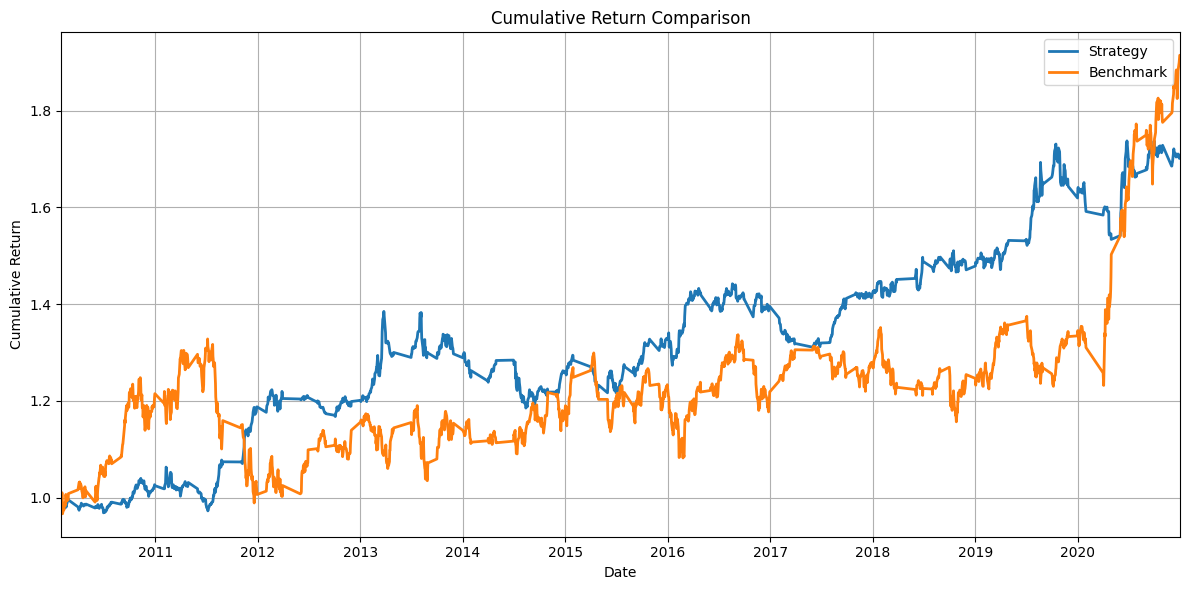

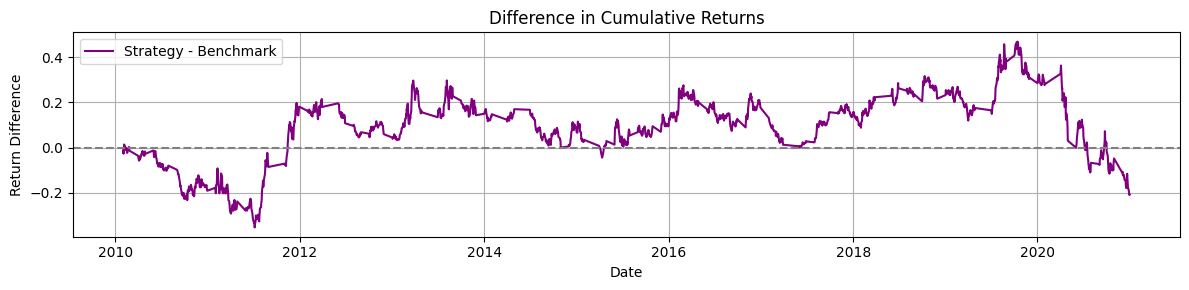

{'strategy': {'annual_return': 0.08227903105411416,
  'volatility': 0.08498791142652652,
  'sharpe_ratio': 0.9681262861159468,
  'max_drawdown': 0.14426017819594592,
  'calmar_ratio': 0.5703516527087336},
 'benchmark': {'annual_return': 0.10078621098116569,
  'volatility': 0.1589147014806011,
  'sharpe_ratio': 0.6342157776602486,
  'max_drawdown': 0.25528659529208386,
  'calmar_ratio': 0.3947963302415156},
 'avg_turnover': 0.12729033507650592,
 'yearly':       Strategy Return  Benchmark Return     Alpha
 Year                                             
 2010         0.024765          0.214845 -0.190080
 2011         0.158913         -0.171636  0.330549
 2012         0.009249          0.132028 -0.122778
 2013         0.082207          0.012871  0.069336
 2014        -0.027543          0.017428 -0.044971
 2015         0.052597          0.050577  0.002020
 2016         0.050907         -0.012119  0.063026
 2017         0.015687          0.049477 -0.033790
 2018         0.037748         -

In [7]:
pnl, returns = strategy2.run_strategy(start_year=2010, end_year=2020)
strategy2.evaluate_performance(pnl)

C:\Users\sengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\sengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\sengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\sengj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value e

==== Cumulative Performance Comparison ====
Metric                        Strategy    Benchmark
Annualized Return              -37.92%        9.70%
Annualized Volatility           12.09%       17.62%
Sharpe Ratio                     -3.14         0.55
Max Drawdown                    99.47%       38.44%
Calmar Ratio                     -0.38         0.25
Average Daily Turnover         143.98%

==== Year-by-Year Returns ====
     Strategy Return Benchmark Return   Alpha
Year                                         
2010         -37.74%           17.95% -55.69%
2011         -25.71%          -24.62%  -1.09%
2012         -50.14%           27.70% -77.84%
2013         -41.74%            6.76% -48.49%
2014         -27.93%           31.39% -59.32%
2015         -24.58%           -4.06% -20.52%
2016         -45.97%            3.01% -48.98%
2017         -31.59%           28.65% -60.24%
2018         -43.39%            3.15% -46.55%
2019         -33.86%           12.02% -45.88%
2020         -39.36% 

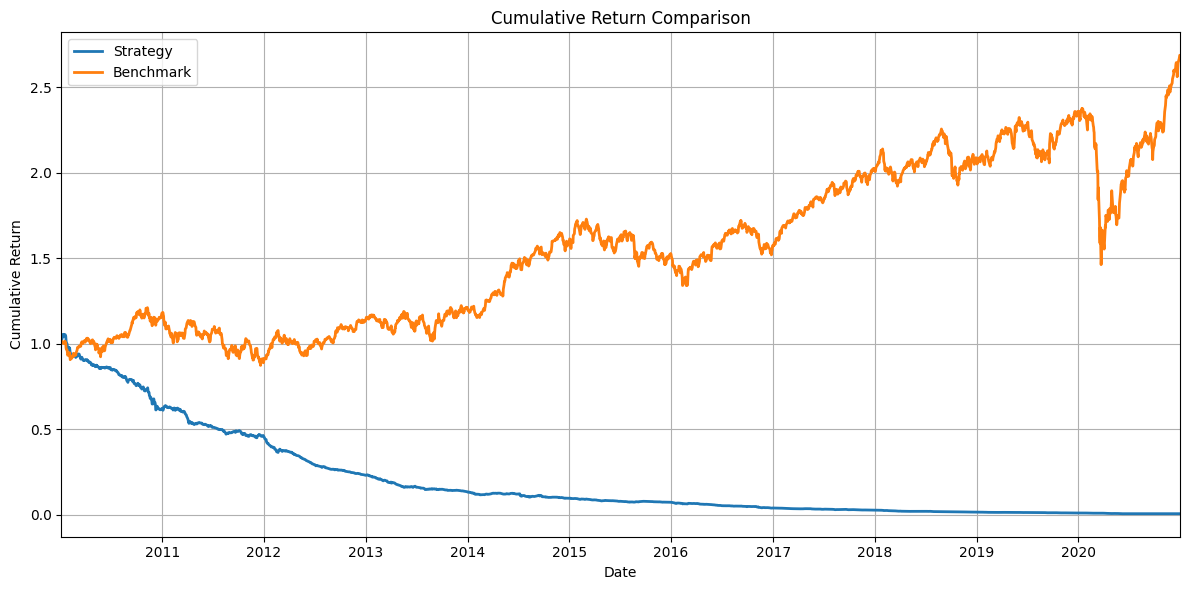

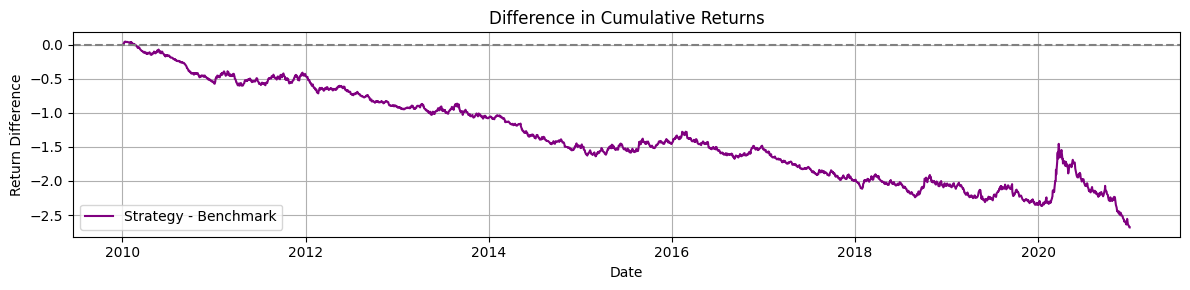

{'strategy': {'annual_return': -0.37921318610914545,
  'volatility': 0.1209228553130446,
  'sharpe_ratio': -3.1359926552134407,
  'max_drawdown': 0.9947428666141048,
  'calmar_ratio': -0.38121729628472456},
 'benchmark': {'annual_return': 0.09695321815524993,
  'volatility': 0.17621672488837187,
  'sharpe_ratio': 0.5501930546982243,
  'max_drawdown': 0.384398524527421,
  'calmar_ratio': 0.25222057830332223},
 'avg_turnover': 1.4398086124401914,
 'yearly':       Strategy Return  Benchmark Return     Alpha
 Year                                             
 2010        -0.377449          0.179473 -0.556923
 2011        -0.257100         -0.246181 -0.010918
 2012        -0.501384          0.276972 -0.778355
 2013        -0.417382          0.067552 -0.484934
 2014        -0.279349          0.313880 -0.593230
 2015        -0.245842         -0.040609 -0.205234
 2016        -0.459690          0.030133 -0.489823
 2017        -0.315934          0.286460 -0.602394
 2018        -0.433947         

In [4]:
# Instantiate the strategy
strategy1 = BaseStrategy(
    PriceData=nifty,
    VolumeData=nifty_volume,
    HighData=nifty_high,
    LowData=nifty_low,
    IndustryMap=industry_map,
    MomentumDaysList=[5,21,63],
    VolDays=21,
    ModelStartPeriod='2009-01-01',
    ModelEndPeriod='2021-3-31',
    benchmark=nsei_pd
)

returns_after_cost, returns_before_cost = strategy1.run_strategy(start_year=2010, end_year=2020)
strategy1.evaluate_performance(returns_after_cost)

In [7]:
returns_after_cost.head()

2010-01-04    0.010882
2010-01-05    0.010156
2010-01-06    0.008222
2010-01-07    0.000987
2010-01-08    0.014399
dtype: float64